## 2) Logistic Regression


- Logistic Regression is also called as Logit Regression is used to estimate the probability that an instance belongs to a particular class(eg: the probability that it rains today?).


- If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class(positive class labelled "1") or else it predicts the probability it does not belong to that class(ie the probability it belongs to negative class labelled "0").


- Just like Linear Regression, a Logistic regression also computes a weighted sum of input features(plus a bias), but instead of outputting the result directly like Linear regression model does, it outputs the Logistic of this result.


$$\hat{p} = \sigma (w^{T}x)$$


- The logistic also called the $logit$, noted as $\sigma (.)$ is a $sigmoid$ function which outputs a number between 0 and 1.

- Logistic Function : 

$$\sigma(t) = \frac{1}{1+\exp^{(-t)}}$$

<img src="images/sigmoid.png" width="700" height="700">


- Once the Logistic Regression model has estimated the probability $\hat{p}$, the model can make predictions using:

$$\hat{y} = \left\{\begin{matrix}
0 &\hat{p}<0.5 \\ 
 1&\hat{p}\geq 0.5
\end{matrix}\right.$$


- $\sigma(t) < 0.5$ when $t < 0$ and $\sigma(t)\geq 0.5$ when $t\geq 0$, ie Logistic Regression predicts $1$ if $w^{T}x$ is positive and $0$ if it is negative.


**Loss Function :**

- The objective of training is to set the parameter vector $w$ so that the model predicts high probability for positive class$(y = 1)$ and low probabilities for negative instances$(y = 0)$. For a single training instance $x$, the loss function can be given as :

$$L(w) = \left\{\begin{matrix}
-log(\hat{p}) & y = 1 \\ 
 -log(1-\hat{p}) & y = 0 
\end{matrix}\right.$$

- $-log(t)$ grows very large when $t$ approaches $0$, so the cost will be large if the model estimates a probability close to $0$ for a positive instance and it will also be very large if the model estimates a probability close to $1$ for a negative instance.


- $-log(t)$ is close to $0$ when $t$ is close to $1$, so the cost will be close to $0$ if estimated probability is close to $0$ for a negative instance or close to $1$ for a positive instance, which is exactly what we need.


- The loss function over the whole training set is simply the average loss over all training instances:

$$L(w) = -\frac{1}{m}\sum_{i=1}^{m}\left [ y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)}) \right ]$$


- Unlike the Linear Regression, there is no closed form/normal equation to find the value of $w$ that minimizes the loss function. But the function is convex one, so Gradient Descent or any other optimization algorithm is guaranteed to find the global minimum.


- The partial derivative of the loss function with respect to the $j^{th}$ model parameter $w_{j}$ is given by:

$$\frac{\delta }{\delta w_{j}}L(w) = \frac{1}{m}\sum_{i=1}^{m}\left ( \sigma \left ( w^{T}x^{(i)} \right ) - y^{(i)} \right )x_{j}^{(i)}$$


- For each instance it computes the prediction error and multiplies it by the $j^{th}$ feature value and then it computes the average over all training instances. Once we get the gradient vector containing all the partial derivatives, we can use it in the GD/SGD/mini-batch SGD.


**Softmax Regression :**

- Logistic Regression can be generalized to support multiple classes directly without having to train and combine multiple binary classifiers. This is called as **Softmax Regression** or **Multinomial Logistic Regression**.


- When given an instance $x$, the Softmax Regression model first computes a score$(z)$ for each class $k$, then estimates the probability of each class by applying a *softmax function*. 


- The equation to calculate the softmax score for class $k$ is given by:

$$z_{k}(x) = (w^{k})^{T}x$$


- Each class has a parameter vector $w^{k}$. All these are typically stored as rows in a parameter matrix $W$


- After computing the score for every class for the instace x, we can estimate the probability $\hat{p}_{k}$ that the instance belong to class $k$ by running the scores through the *softmax function*. Which is given as:


$$\hat{p}_{k} = \sigma(z(x))_{k} = \frac{\exp(z_{k}(x))}{\sum_{j=1}^{K}\exp(z_{j}(x))}$$

- The softmax function computes the exponential of every score and then normalizes them by dividing by the sum of all the exponents.

- $K$ is the total number of classes


- $z(x)$ is a vector containing the scores of each class for the instance $x$


- $\sigma(z(x))_{k}$ is the estimated probability that the instance $x$ belongs to the class $k$ given the scores of each class ffor that instance.


- Like Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability(which is simply the class with the highest score):

$$\hat{y} = \underset{k}{argmax} (\sigma(z(x))_{k}) = \underset{k}{argmax}(z_{k}(x)) = \underset{k}{argmax}((w^{(k)})^{T}x)$$


- The Softmax regression only predicts one class at a time(it is multiclass not multioutput), so it should only be used with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture.


- The objective is to have a model that estimates high probability for the target class and low probability for the other class. So for this we need to minimize the cross entropy loss which penalizes the model when it estimates a low probability for a target class.


$$L(W)= -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}y_{k}^{(i)}log(\hat{p}_{k}^{(i)})$$


- $y_{k}^{i}$ is equal to $1$ if the target class for the $i^{th}$ instance is $k$; otherwise it is equal to 0.


- When there is two classes $(K = 2)$, the loss function is equivalent to the Logistic Regression Loss function.


- Cross entropy is used to measure how well a set of estimated class probabilities match the target class.


- For class $k$, the gradient vector for the cross entropy loss is given by :

$$\bigtriangledown _{w^{(k)}}L(W) = \frac{1}{m}\sum_{i=1}^{m}\left ( \hat{p}_{k}^{(i)} - y_{k}^{(i)} \right )x^{(i)}$$



- Now we can compute the gradient vector for every class, and then use Gradient Descent or any other Optimization algorithm to find the parameter matrix $W$ that minimizes the loss function.


**Logistic regression Assumptions :**



1)  Binary logistic regression requires the dependent variable to be binary and Softmax regression requires the dependent variable to be ordinal.


2) Observations should be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.


3) Little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.


4) Logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


5) Logistic regression typically requires a large sample size.

### Logistic Regression using SGD

In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
from sklearn.metrics import accuracy_score

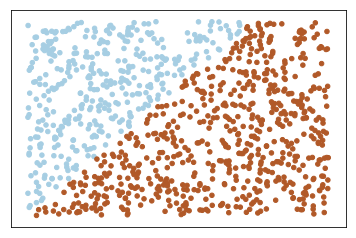

In [58]:
X = np.random.rand(1000,2)
y = 4 * X[:, 0] + -3 * X[:, 1]   # True Weights = [4,-3]
y = np.round(1/(1 + np.exp(-y)))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
#plt.show()
plt.xticks([])
plt.yticks([])
plt.savefig('data.png')

- We can clearly see that the data is Linearly Separable.

In [81]:
#To build Logistic regression we need to get the probability that a datapoint belongs to a class
def get_probs(X, w):
    prob = 1/(1+(np.exp(-np.dot(X,w))))
    return np.array(prob)

#Define the loss function
def log_loss(X,w,y):
    loss = -np.sum(((y*np.log(get_probs(X,w)) + (1-y)*(np.log(1-get_probs(X,w)))))/X.shape[0])    
    return loss

#Define the function that returns the gradients of loss function
def get_grads(X,w,y):
    grad = np.dot((get_probs(X,w)-y),X)/X.shape[0]
    return grad

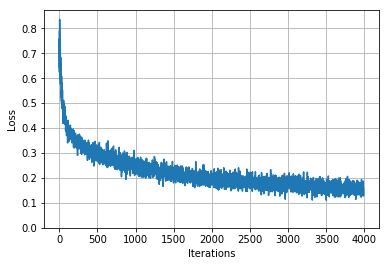

In [82]:
#mini-batch SGD
np.random.seed(42)
w = np.array([1,-3]) #Initial Weights
eta= 0.1 # learning rate
n_iter = 4000 # Number of Iterations
batch_size = 128
loss = np.zeros(n_iter)

es = 0.1 #For early stopping 

for i in range(n_iter):
    ind = np.random.choice(X.shape[0], batch_size)
    loss[i] = log_loss(X[ind, :], w, y[ind])
    w = w - eta*get_grads(X[ind, :], w, y[ind])
    if(i%10==0):
        plt.plot(loss[:i])
        plt.grid()
        ymin, ymax = plt.ylim()
        plt.ylim(0, ymax)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        display.clear_output(wait=True)
        plt.show()
    
    if(loss[i]<es):
        break

In [83]:
print("mini-batch SGD Converged in : ",i+1)
print("FInal Weights",w)
print('Final Loss = ',log_loss(X,w,y) )

mini-batch SGD Converged in :  4000
FInal Weights [ 9.59095276 -6.92521377]
Final Loss =  0.1559774112981103


In [84]:
pred = np.dot(X,w)
pred = np.round(1/(1 + np.exp(-pred)))
print("Accuracy = ",accuracy_score(y,pred))

Accuracy =  0.99


#### SGD With Momentum

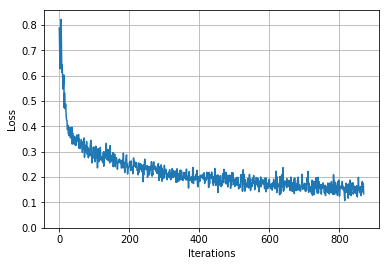

In [85]:
np.random.seed(42)
w = np.array([1,-3]) #Initial Weights

eta = 0.05 # learning rate
alpha = 0.9 # momentum

h = np.zeros_like(w)#This is the additional vector

es = 0.1 #For early stopping 


n_iter = 4000 # Number Of iterations
batch_size = 128
loss = np.zeros(n_iter)


for i in range(n_iter):
    ind = np.random.choice(X.shape[0], batch_size)
    loss[i] = log_loss(X[ind, :], w, y[ind])
    
    h = alpha*h + eta*get_grads(X[ind, :], w, y[ind])
    
    w = w-h
    
    if(i%10==0):
        plt.plot(loss[:i])
        plt.grid()
        ymin, ymax = plt.ylim()
        plt.ylim(0, ymax)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        display.clear_output(wait=True)
        plt.show()
        
        
    if(loss[i]<es):
        break

In [86]:
print("mini-batch SGD Converged in : ",i)
print("FInal Weights",w)
print('Final Loss = ',log_loss(X,w,y) )

mini-batch SGD Converged in :  872
FInal Weights [ 9.97114685 -7.24539683]
Final Loss =  0.15041100165875862


In [87]:
pred = np.dot(X,w)
pred = np.round(1/(1 + np.exp(-pred)))
print("Accuracy = ",accuracy_score(y,pred))

Accuracy =  0.992


- Algorithm Converged faster as well as the accuracy has improved, However you can run the algorithm for more iterations, to reduce loss and get better results.

#### SGD With Nestrov accelerated momentum

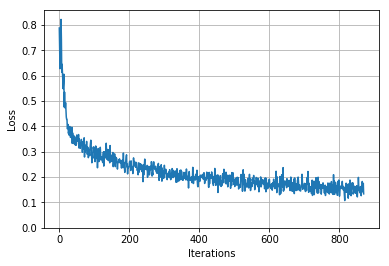

In [88]:
np.random.seed(42)
w = np.array([1,-3]) #Initial Weights

eta = 0.05 # learning rate
alpha = 0.9 # momentum

h = np.zeros_like(w)  #This is the additional vector

es = 0.1 #For early stopping 


n_iter = 4000
batch_size = 128
loss = np.zeros(n_iter)


for i in range(n_iter):
    ind = np.random.choice(X.shape[0], batch_size)
    loss[i] = log_loss(X[ind, :], w, y[ind])
    
    h = alpha*h + eta*get_grads(X[ind, :], w-alpha*h, y[ind])  #Only change is here
    
    w = w-h
    
    if(i%10==0):
        plt.plot(loss[:i])
        plt.grid()
        ymin, ymax = plt.ylim()
        plt.ylim(0, ymax)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        display.clear_output(wait=True)
        plt.show()
        
        
    if(loss[i]<es):
        break

In [89]:
print("mini-batch SGD Converged in : ",i)
print("FInal Weights",w)
print('Final Loss = ',log_loss(X,w,y) )
pred = np.dot(X,w)
pred = np.round(1/(1 + np.exp(-pred)))
print("Accuracy = ",accuracy_score(y,pred))

mini-batch SGD Converged in :  872
FInal Weights [ 9.96231378 -7.23880186]
Final Loss =  0.15053107569413945
Accuracy =  0.992


#### RMSProp

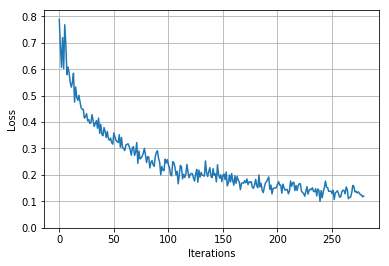

In [90]:
np.random.seed(42)
w = np.array([1,-3]) #Initial Weights

eta = 0.05 # learning rate
alpha = 0.9 # momentum
gt = None
eps = 1e-8
es = 0.1 #For early stopping 


n_iter = 4000
batch_size = 128
loss = np.zeros(n_iter)

for i in range(n_iter):
    ind = np.random.choice(X.shape[0], batch_size)
    loss[i] = log_loss(X[ind, :], w, y[ind])
    
    gt = get_grads(X[ind, :], w, y[ind])**2
    gt = alpha*gt +(1-alpha)*gt
    
    w = w-(eta*get_grads(X[ind, :], w, y[ind]))/np.sqrt(gt+eps)
    
    if(i%10==0):
        plt.plot(loss[:i])
        plt.grid()
        ymin, ymax = plt.ylim()
        plt.ylim(0, ymax)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        display.clear_output(wait=True)
        plt.show()
        
    if(loss[i]<es):
        break

In [91]:
print("mini-batch SGD Converged in : ",i)
print("FInal Weights",w)
print('Final Loss = ',log_loss(X,w,y) )
pred = np.dot(X,w)
pred = np.round(1/(1 + np.exp(-pred)))
print("Accuracy = ",accuracy_score(y,pred))

mini-batch SGD Converged in :  285
FInal Weights [12.50049465 -8.87881301]
Final Loss =  0.12424894388155361
Accuracy =  0.983


#### Adam

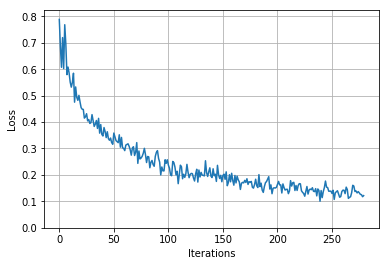

In [92]:
np.random.seed(42)
w = np.array([1,-3]) #Initial Weights

eta = 0.05 # learning rate
alpha = 0.9 # momentum
gt = None
vt = 0
beta = 0.0005

eps = 1e-8
es = 0.1 #For early stopping 


n_iter = 4000
batch_size = 128
loss = np.zeros(n_iter)

for i in range(n_iter):
    ind = np.random.choice(X.shape[0], batch_size)
    loss[i] = log_loss(X[ind, :], w, y[ind])
    
    gt = get_grads(X[ind, :], w, y[ind])**2
    
    vt = (beta*vt) + (1-beta)*gt 
    
    w = w-(eta*get_grads(X[ind, :], w, y[ind]))/np.sqrt(vt)+eps
    
    if(i%10==0):
        plt.plot(loss[:i])
        plt.grid()
        ymin, ymax = plt.ylim()
        plt.ylim(0, ymax)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        display.clear_output(wait=True)
        plt.show()
        
    if(loss[i]<es):
        break

In [93]:
print("mini-batch SGD Converged in : ",i)
print("FInal Weights",w)
print('Final Loss = ',log_loss(X,w,y) )
pred = np.dot(X,w)
pred = np.round(1/(1 + np.exp(-pred)))
print("Accuracy = ",accuracy_score(y,pred))

mini-batch SGD Converged in :  285
FInal Weights [12.37993968 -8.78093536]
Final Loss =  0.12546993021332192
Accuracy =  0.983


- This is a very simple implementation and I haven't used any Regularization also.